In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Penguin Dataset taken : - 

In [5]:
df = pd.read_csv("penguins_size.csv")

In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### We have 3 species and islands here

In [10]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [9]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Null values 

In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### drop for rows as data loss is 3%

In [32]:
df1 = df.dropna()

In [33]:
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


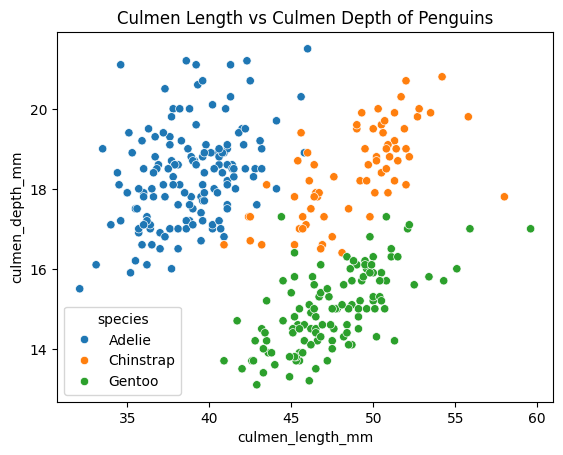

In [35]:
sns.scatterplot(
    data=df1,
    x="culmen_length_mm", 
    y="culmen_depth_mm", 
    hue="species",    # color by species
)

plt.title("Culmen Length vs Culmen Depth of Penguins")
plt.show()

In [37]:
df1['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [42]:
df1[df1['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [43]:
df1[df1['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    59.000000    61.000000
                  mean     45.545763    49.473770
                  std       2.038197     2.720594
                  min      40.900000    44.400000
                  25%      43.900000    48.100000
                  50%      45.500000    49.500000
                  75%      46.850000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    59.000000    61.000000
                  mean     14.262712    15.718033
                  std       0.568391     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.300000    15.700000
                  75%      14.600000    16.100000
                  max      15.700000    17.300000
flipper_length_mm count    59.000000    61.000000
                  mean    212.779661   221.540984
                  std       3.904320     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.500000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    59.000000    61.000000
                  mean   4683.050847  5484.836066
                  std     280.295437   313.158596
                  min    3950.000000  4750.000000
                  25%    4475.000000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

In [45]:
df1.loc[:, 'sex'] = df1['sex'].replace('.', 'FEMALE')

In [47]:
df1['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

### Feature Engineering 

In [51]:
X = pd.get_dummies(df1.drop('species',axis=1),drop_first=True)

In [53]:
y = df1['species']

### Train test split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
model = GaussianNB()

In [64]:
model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


# Step 4: Make Predictions on Test Data
We predict the labels for the test set.

In [65]:
y_pred = model.predict(X_test)

In [68]:
y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gen

In [70]:
y_test.head(20)

30        Adelie
317       Gentoo
79        Adelie
201    Chinstrap
63        Adelie
304       Gentoo
289       Gentoo
186    Chinstrap
217    Chinstrap
203    Chinstrap
81        Adelie
14        Adelie
329       Gentoo
132       Adelie
272       Gentoo
138       Adelie
120       Adelie
152    Chinstrap
82        Adelie
282       Gentoo
Name: species, dtype: object

# Step 5: Evaluate the Model
We use accuracy, confusion matrix, and classification report to evaluate the model.


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Accuracy: 0.9405940594059405
Confusion Matrix:
 [[43  6  0]
 [ 0 18  0]
 [ 0  0 34]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.88      0.93        49
   Chinstrap       0.75      1.00      0.86        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.94       101
   macro avg       0.92      0.96      0.93       101
weighted avg       0.96      0.94      0.94       101

